In [13]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [14]:
path = os.getcwd() + "/image_data"
path

'd:\\Study\\Code\\Python\\Sound_Classification_Bee_Qeen_Queenless/image_data'

In [15]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/image_data/train
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/image_data/val
d:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/image_data/test


In [16]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  train_datagen = ImageDataGenerator(rescale=1.0/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode="binary",
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                target_size=(224, 224))
  test_datagen = ImageDataGenerator(rescale=1.0/255)
  
  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                    batch_size=32,
                                                    class_mode="binary",
                                                    target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [17]:
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

class_names = train_generator.class_indices
print(class_names)

Found 14000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
{'Queen': 0, 'Queenless': 1}


In [18]:
img1, img2 = train_generator[0][:2]

In [19]:
# fig, ax = plt.subplots(2,3, figsize=(10,8))

# ax[0].plot(img1, x_axis='time')

In [55]:
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation = "elu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation = "elu", padding="same",  kernel_regularizer=keras.regularizers.l2(0.0001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation = "elu", padding="same",  kernel_regularizer=keras.regularizers.l2(0.0001)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation = "elu", padding="same",  kernel_regularizer=keras.regularizers.l2(0.0001)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation = "elu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation = "sigmoid", kernel_regularizer=keras.regularizers.l2(0.0001))               
])
# activation = "elu", "relu", "selu", "sigmoid", "softmax", "softplus", "softsign", "tanh", "exponential"

In [56]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# tf.keras.losses.BinaryCrossentropy()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 55, 55, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 27, 27, 64)      

In [57]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [58]:
epochs = 120
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks = [earlystopper]
)

Epoch 1/120
438/438 [==============================] - 41s 90ms/step - loss: 0.8065 - accuracy: 0.6426 - val_loss: 0.6321 - val_accuracy: 0.7205
Epoch 2/120
438/438 [==============================] - 39s 89ms/step - loss: 0.6142 - accuracy: 0.7341 - val_loss: 0.5882 - val_accuracy: 0.7455
Epoch 3/120
438/438 [==============================] - 39s 90ms/step - loss: 0.5675 - accuracy: 0.7541 - val_loss: 0.5561 - val_accuracy: 0.7685
Epoch 4/120
438/438 [==============================] - 39s 90ms/step - loss: 0.5480 - accuracy: 0.7653 - val_loss: 0.5367 - val_accuracy: 0.7635
Epoch 5/120
438/438 [==============================] - 40s 90ms/step - loss: 0.5275 - accuracy: 0.7795 - val_loss: 0.6176 - val_accuracy: 0.7005
Epoch 6/120
438/438 [==============================] - 40s 91ms/step - loss: 0.5268 - accuracy: 0.7790 - val_loss: 0.5087 - val_accuracy: 0.8025
Epoch 7/120
438/438 [==============================] - 40s 91ms/step - loss: 0.5167 - accuracy: 0.7839 - val_loss: 0.4957 - val_ac

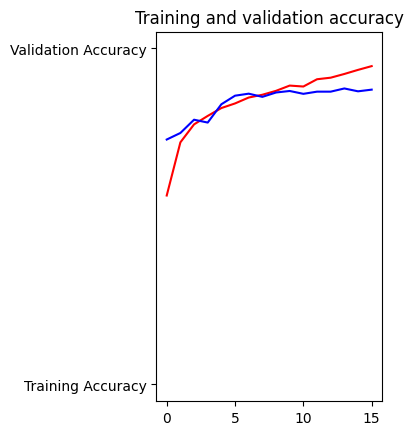

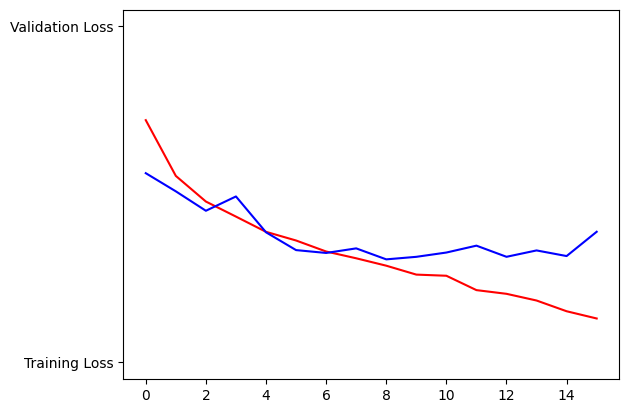

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [25]:
test_predict = model.predict(test_generator)

125/125 [==============================] - 27s 214ms/step


In [26]:
show_test_predict = np.round(test_predict, 0)
show_test_predict = pd.DataFrame(show_test_predict)
print(show_test_predict)
print(len(show_test_predict))

        0
0     1.0
1     0.0
2     0.0
3     1.0
4     1.0
...   ...
3995  1.0
3996  0.0
3997  0.0
3998  1.0
3999  1.0

[4000 rows x 1 columns]
4000


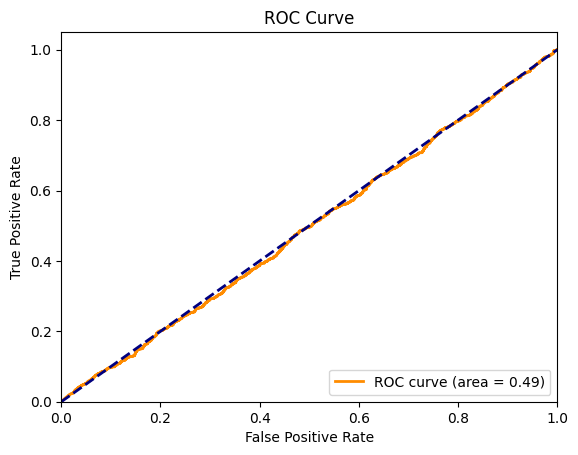

In [27]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_generator.classes, test_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [28]:
from sklearn.metrics import f1_score
f1_score(test_generator.classes, show_test_predict, average='macro')

0.49699949699949697

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_generator.classes, show_test_predict)

array([[ 992, 1008],
       [1004,  996]], dtype=int64)

In [30]:
model.evaluate(test_generator)

125/125 [==============================] - 10s 82ms/step - loss: 0.3089 - accuracy: 0.8630


[0.3088504672050476, 0.8629999756813049]

In [31]:
# os.chdir("D:\\Study\\Code\\Python\\2023Sound_Classification_Bee_Qeen_Queenless\\Models")
model.save("CNN.h5")

In [32]:
# STFT, Chroma
# C1:using wavelet --> Feature selection
# C2: MFCC --> spectral --> vector(using average) --> feature selection --> ML(KNN, SVM, Logistic)
# C3: HHT --> spectral --> average --> HHT 
# ==> Apply DL, ML
## => Comparison(time, accuracy,...)

In [33]:
# Chossing dataset 
# Date
# Time [~m --> ~m]